# Lead Scoring Case Study

#### Problem Statement:

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

#### Goals of the Case Study:
There are quite a few goals for this case study:

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

   #### Approach:

   ***Understanding Problem-***

   ***Understanding Data Dictionary-***

       1.Import Required Libraries
       2.Data Understanding
       3.Data Quality Checking & Cleaning
       4.Exploratory Data Analysis
       5.Splitting Data: Test & Train set
       6.Scaling Data
       7.Model Building
       8.Making Prediction on Train Dataset
       9.Finding Optimal Cutoff
       10.Prediction on Test Data
       11.Model Evaluation
       12.Determining Top Features
       13.Recommendation

===========================================================================================================

### 1.Import Required Libraries

In [1]:
# Import basic Liabrary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

In [2]:
# Import liabraries for Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [3]:
# Read dataset
df_lead_score = pd.read_csv ("Leads.csv")

### 2. Data Understanding

In [4]:
# Checking Dataset
df_lead_score.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [5]:
# All columns are not visible here, so need to see all
pd.set_option ('display.max_columns',70)

In [6]:
# Checking Dataset
df_lead_score.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [7]:
# Checking Columns & Rows count
df_lead_score.shape

(9240, 37)

In [8]:
# Basic information about dataframe
df_lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##### Observation:  
Null values present in dataset.

In [9]:
# Basic Statistics for understanding data
df_lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### 3. Data Quality Checking & Cleaning

#### Checking Duplicate

In [10]:
# Checking Duplicate
df_lead_score_duplicate= df_lead_score.copy()
df_lead_score_duplicate.drop_duplicates(subset=None, inplace=True)

df_lead_score_duplicate.shape

(9240, 37)

##### Observation: 
No duplicate rows found, because 'df_lead_score_duplicate' & 'df_lead_score' shape is same.

In [11]:
# Null value present in dataset
df_lead_score_missing_val= df_lead_score.isnull().sum().sort_values(ascending=False)
df_lead_score_missing_per= (df_lead_score.isnull().sum()/len(df_lead_score)*100).sort_values(ascending=False)
df_lead_score_missing_val = round (pd.concat([df_lead_score_missing_val,df_lead_score_missing_per], axis=1, \
                                             keys=['Tot_Miss_Val', 'Per_Miss_Val']),2)
df_lead_score_missing_val

,Tot_Miss_Val,Per_Miss_Val
Lead Quality,4767,51.59
Asymmetrique Activity Index,4218,45.65
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Tags,3353,36.29
Lead Profile,2709,29.32
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63


#### Replacing 'SELECT' with Null Value

In [12]:
# Replacing SELECT with NaN Value as while filling form,customer left this option as it is. 

In [13]:
# Checking the values present in the 'Lead Quality' column
df_lead_score['Lead Quality'].value_counts()

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [14]:
# Coverting the 'Select' values into 'NaN'
df_lead_score.loc[df_lead_score['Lead Quality']=='Select','Lead Quality']=np.nan

In [15]:
# Checking the missing values
df_lead_score['Lead Quality'].isnull().sum()

4767

In [16]:
# Filling the missing values with 'Not known'
df_lead_score['Lead Quality']=df_lead_score['Lead Quality'].fillna("Not known")

In [17]:
# Checking the missing values
df_lead_score['Lead Quality'].isnull().sum()

0

In [18]:
# Checking the values present in the 'Asymmetrique Activity Index' column
df_lead_score['Asymmetrique Activity Index'].value_counts()

Asymmetrique Activity Index
02.Medium    3839
01.High       821
03.Low        362
Name: count, dtype: int64

#### Dropping Unnecessary Columns

In [19]:
# As the columns have more than 40 % missing values and somewhat redundant so we will drop them
df_lead_score=df_lead_score.drop(['Asymmetrique Profile Index','Asymmetrique Activity Score',\
                                  'Asymmetrique Profile Score'],axis=1)

In [20]:
# Converting the categorical values in the 'Asymmetrique Activity Index' into numerical for easy analysis
df_lead_score['Asymmetrique Activity Index']=df_lead_score['Asymmetrique Activity Index'].apply(lambda x:1 if x=='01.High' \
                                                                          else 2 if x=='02.Medium' else 3)

In [21]:
# Checking the values present in the 'Asymmetrique Activity Index' column
df_lead_score['Asymmetrique Activity Index'].value_counts()

Asymmetrique Activity Index
3    4580
2    3839
1     821
Name: count, dtype: int64

In [22]:
# Checking information of dataframe again
df_lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 34 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [23]:
# Checking the values in 'What is your current occupation' column
df_lead_score['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [24]:
# Coverting the 'Select' values into 'NaN'
df_lead_score.loc[df_lead_score['How did you hear about X Education']=='Select', \
                  'How did you hear about X Education']=np.nan

In [25]:
# Counting the values in 'Tags' column
df_lead_score['Tags'].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [26]:
# Before replacing 'SELECT' value need to understand, how many columns have this value

all_col = list(df_lead_score.columns)
for i in all_col:
    if 'Select' in df_lead_score[i].values:
        print (i)

Specialization
Lead Profile
City


##### Obeservation: 
There 3 more columns having 'Select' as value and needs to be treated as null value.

In [27]:
# Replacing SELECT with Null Value
df_lead_score= df_lead_score.replace ('Select', np.nan)

In [28]:
# Checking replaced or not with nan
df_lead_score.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,2,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not known,No,No,NaN,NaN,2,No,No,Email Opened


In [29]:
cols_in_lead_score = (df_lead_score.isnull().sum()/df_lead_score.shape[0])*100 
cols_in_lead_score = cols_in_lead_score[cols_in_lead_score>= 15] 
cols_in_lead_score

Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Profile                                     74.188312
City                                             39.707792
dtype: float64

In [30]:
cols_in_lead_score=cols_in_lead_score.index.tolist()

In [31]:
cols_in_lead_score

['Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Profile',
 'City']

In [32]:
for i in cols_in_lead_score:
    df_lead_score[i]=df_lead_score[i].fillna('Unknown')

In [33]:
df_lead_score.isnull().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Country                                            0
Specialization                                     0
How did you hear about X Education                 0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                             

In [34]:
df_lead_score=df_lead_score.dropna()

In [35]:
df_lead_score.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [36]:
df_lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 34 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 non-n

In [37]:
df_lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unknown,Unknown,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Unknown,Unknown,2,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unknown,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not known,No,No,Unknown,Unknown,2,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Unknown,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,2,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Unknown,Mumbai,2,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Unknown,Mumbai,2,No,No,Modified


In [38]:
# Single unique value in column
unique_count = df_lead_score.nunique().reset_index()
unique_count.columns= ['Column', 'Unique_count']
unique_count

,Column,Unique_count
0,Prospect ID,9074
1,Lead Number,9074
2,Lead Origin,4
3,Lead Source,21
4,Do Not Email,2
5,Do Not Call,2
6,Converted,2
7,TotalVisits,41
8,Total Time Spent on Website,1717
9,Page Views Per Visit,114


In [39]:
# List of unique value in column
unique_count_is_1= unique_count [unique_count ['Unique_count'] == 1]
unique_count_is_1_list= unique_count_is_1['Column'].tolist()
unique_count_is_1_list

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [40]:
# Dropping these column which having only one unique value
df_lead_score_clean= df_lead_score.drop(unique_count_is_1_list, axis=1)
df_lead_score_clean.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unknown,Unknown,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Unknown,Unknown,2,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unknown,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not known,Unknown,Unknown,2,No,Email Opened


In [41]:
# Checking new dataframes columns & rows
df_lead_score_clean.shape

(9074, 29)

In [42]:
# Other unnecessary columns
df_lead_score_clean_2= df_lead_score_clean.drop(['Prospect ID'], axis=1)
df_lead_score_clean_2.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unknown,Unknown,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Unknown,Unknown,2,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unknown,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not known,Unknown,Unknown,2,No,Email Opened


In [43]:
# Checking new dataframes columns & rows
df_lead_score_clean_2.shape

(9074, 28)

##### Observation: 
There is no null values in dataset.

#### Data Balancing / Outlier Treatment- Categorical Columns

In [44]:
# Value count for all columns

for column in df_lead_score_clean_2:
    print (df_lead_score_clean_2[column].astype('category').value_counts())
    print ('=================================================')

Lead Number
579533    1
630088    1
630039    1
630041    1
630042    1
         ..
602403    1
602402    1
602392    1
602388    1
660737    1
Name: count, Length: 9074, dtype: int64
Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: count, dtype: int64
Do Not Email
No     8358
Yes     716
Name: count, dtype: int64
Do 

In [45]:
# Column values count less than 5 as 'Other', for better data understanding
col_replace= ['Lost to Others',
    'Still Thinking',
    'Want to take admission but has financial problems',
    'Interested in Next batch',
    'In confusion whether part time or DLP',
    'Lateral student',
    'Shall take in the next coming month',
    'University not recognized',
    'Recognition issue (DEC approval)',
    'Email Marked Spam',
    'Approached upfront',
    'Email Received',
    'Form Submitted on Website',
    'Resubscribed to emails',
    'View in browser link Clicked',
    'Visited Booth in Tradeshow']

In [46]:
# Replacing those having value count less than 5 as 'Other'.
df_lead_score_clean_2 = df_lead_score_clean_2.replace(to_replace=col_replace, value='Others')

# Checking value_counts
df_lead_score_clean_2['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                    3267
Email Opened                2823
SMS Sent                    2152
Page Visited on Website      318
Olark Chat Conversation      183
Email Link Clicked           173
Email Bounced                 60
Unsubscribed                  45
Unreachable                   32
Had a Phone Conversation      14
Others                         7
Name: count, dtype: int64

In [47]:
# checking shape of df
df_lead_score_clean_2.shape

(9074, 28)

#### Outlier Handling 

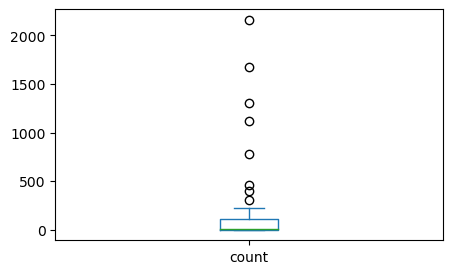

In [48]:
# TotalVisits frequencies
plt.figure(figsize=(5,3))
df_lead_score_clean_2.TotalVisits.value_counts().plot.box()
plt.show()

In [49]:
# need quantile 0.99 for capping outlier
TotalVisits_cap= df_lead_score_clean_2.TotalVisits.quantile(0.99)
TotalVisits_cap

17.0

In [50]:
# capping outlier using 0.99 quantile
df_lead_score_clean_2['TotalVisits'] = df_lead_score_clean_2['TotalVisits'].clip(upper=TotalVisits_cap)

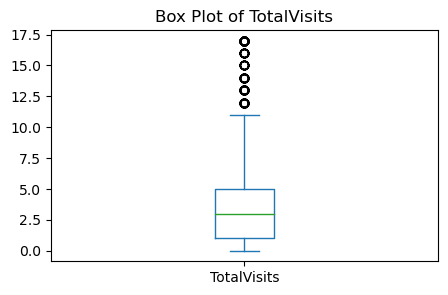

In [51]:
# TotalVisits frequencies
plt.figure(figsize=(5,3))
df_lead_score_clean_2['TotalVisits'].plot.box()
plt.title('Box Plot of TotalVisits')
plt.show()

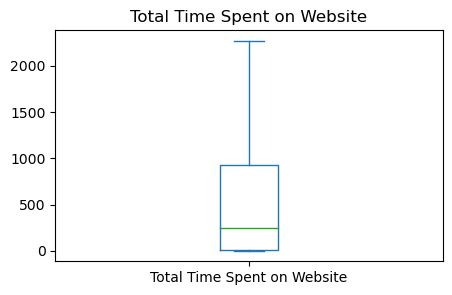

In [52]:
# Total Time Spent on Website
plt.figure(figsize=(5,3))
df_lead_score_clean_2['Total Time Spent on Website'].plot.box()
plt.title('Total Time Spent on Website')
plt.show()

##### Observation: 
No Outlier Treatment needed.

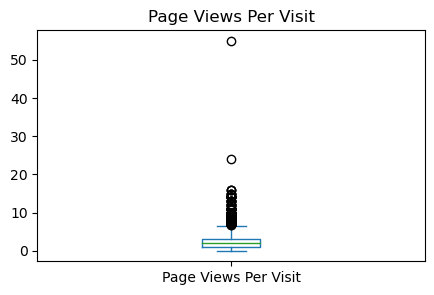

In [53]:
# Total Time Spent on Website
plt.figure(figsize=(5,3))
df_lead_score_clean_2['Page Views Per Visit'].plot.box()
plt.title('Page Views Per Visit')
plt.show()

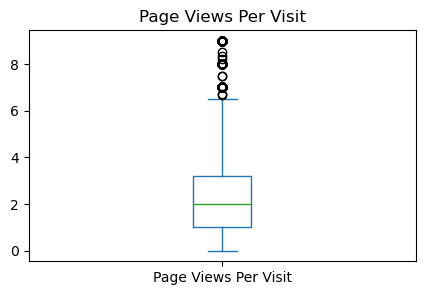

In [54]:
# Outlier present, so treatment needed
# capping outlier using 0.99 quantile
PageViews_cap= df_lead_score_clean_2['Page Views Per Visit'].quantile(0.99)

# capping outlier using 0.99 quantile
df_lead_score_clean_2['Page Views Per Visit'] = df_lead_score_clean_2['Page Views Per Visit'].clip(upper=PageViews_cap)

# Total Time Spent on Website
plt.figure(figsize=(5,3))
df_lead_score_clean_2['Page Views Per Visit'].plot.box()
plt.title('Page Views Per Visit')
plt.show()

In [55]:
# Renaming df_lead_score_clean_2 as df_lead_score_cleaned
df_lead_score_cleaned = df_lead_score_clean_2

### 4. Exploratory  Data Analysis

In [56]:
# 'Converted' is Target column (0: Not converted into lead, 1: Lead successfully Converted)
df_con= df_lead_score_cleaned.Converted.value_counts().reset_index()
df_con.columns = ['Converted', 'count']
df_con['Percentage'] = df_con['count']/df_con['count'].sum()*100
df_con

,Converted,count,Percentage
0,0,5639,62.144589
1,1,3435,37.855411


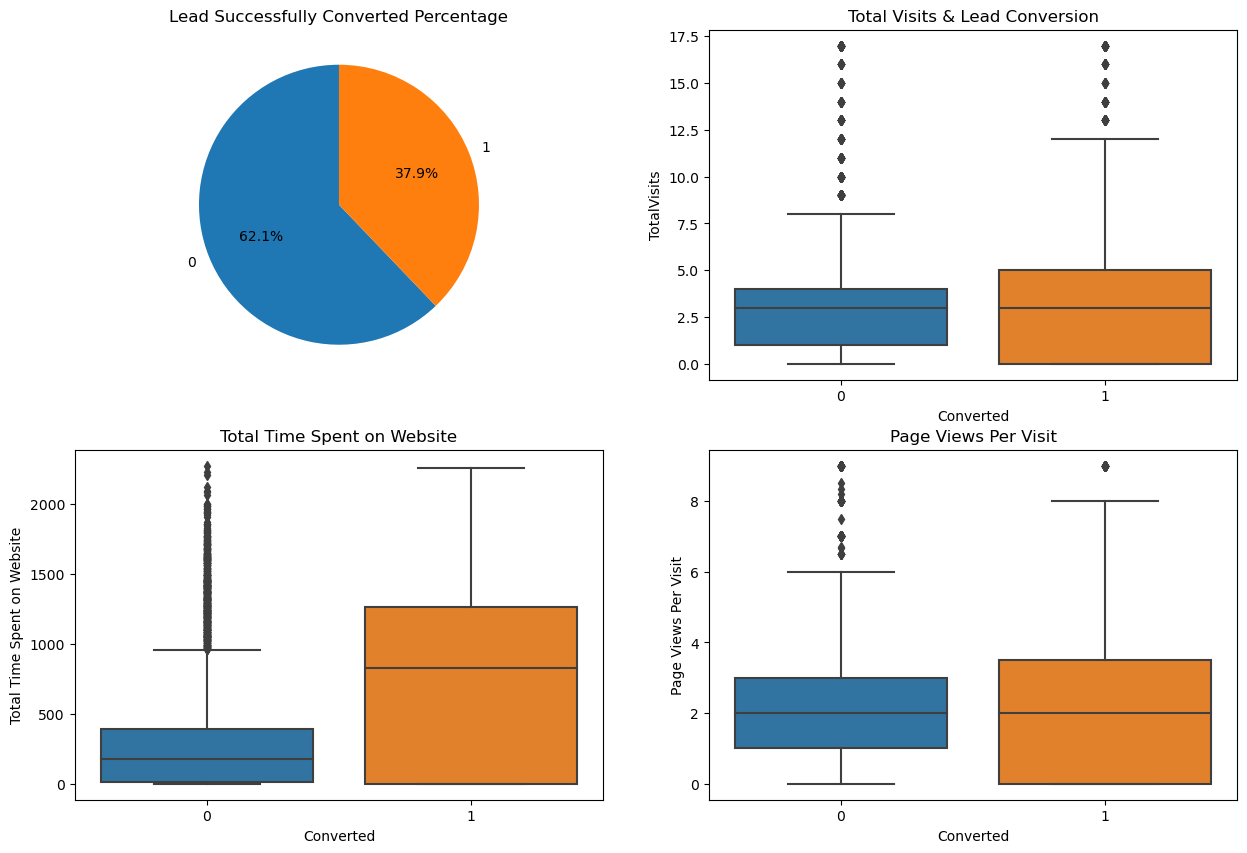

In [57]:
# Plots > Numerical columns with Lead Converted

plt.figure (figsize= (15,10))
plt.subplot(2,2,1)
plt.pie(df_con['count'], labels=df_con['Converted'], autopct='%1.1f%%', startangle=90)
plt.title('Lead Successfully Converted Percentage')

plt.subplot(2,2,2)
sns.boxplot(data=df_lead_score_cleaned, x='Converted', y='TotalVisits' )
plt.title('Total Visits & Lead Conversion')

plt.subplot(2,2,3)
sns.boxplot(data=df_lead_score_cleaned, x='Converted', y='Total Time Spent on Website' )
plt.title('Total Time Spent on Website')

plt.subplot(2,2,4)
sns.boxplot(data=df_lead_score_cleaned, x='Converted', y='Page Views Per Visit' )
plt.title('Page Views Per Visit')

plt.show()

##### Insight:
   1. Lead conversion rate is 37.9%.
   2. Data seems properly balanced.
   3. Higher lead conversion occurs when customers visit a website more time.
   4. Higher lead conversion occurs when customers spent more time.
   3. Higher lead conversion occurs when customers page vies per visit.

In [58]:
# 'Lead Origin' to Lead converted count

crosstab_LeadOrigin= pd.crosstab (df_lead_score_cleaned['Converted'], df_lead_score_cleaned['Lead Origin'])
crosstab_LeadOrigin

Lead Origin,API,Landing Page Submission,Lead Add Form,Lead Import
Converted,,,,
0,2463,3118,37,21
1,1115,1767,544,9


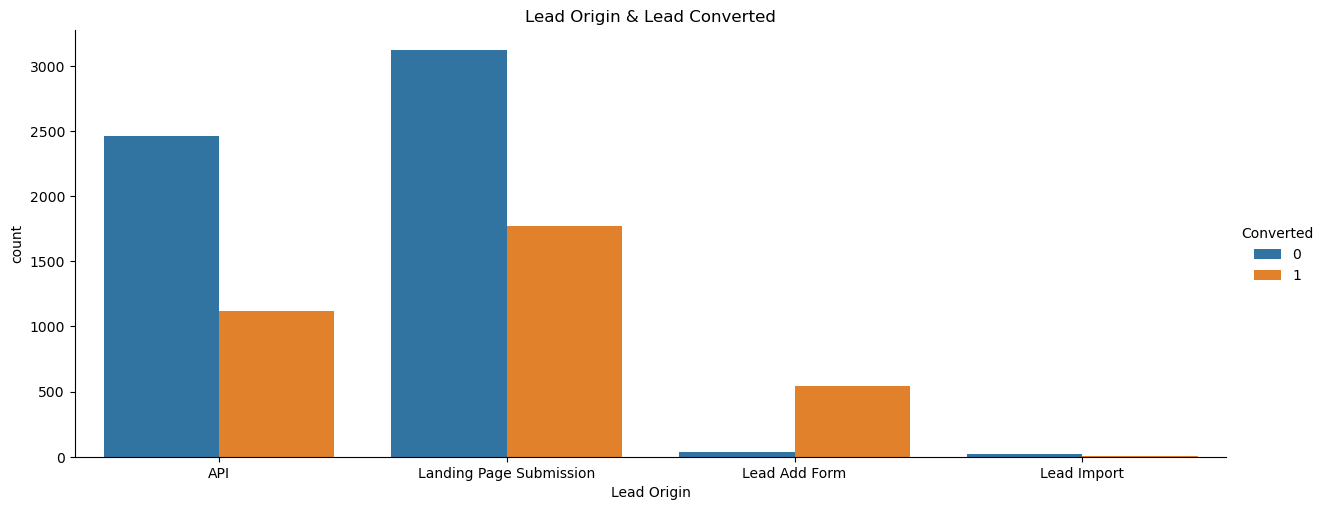

In [59]:
# Lead Origin & Lead Converted'
sns.catplot (data=df_lead_score_cleaned, x= 'Lead Origin', hue= 'Converted', kind='count',aspect =2.5)
plt.title ('Lead Origin & Lead Converted')
plt.show()

##### Insight: 
API & Landing Page Submission having higher non lead conversion count. But Lead Add form having high conversion count.

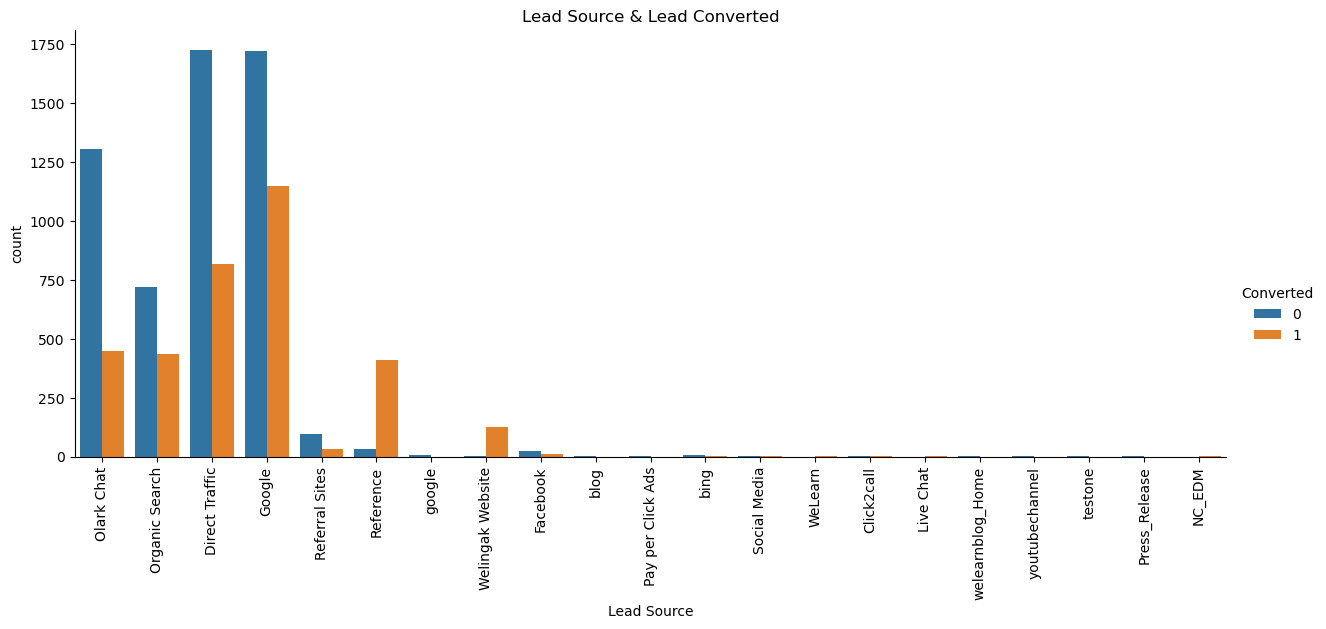

In [60]:
# Lead Origin & Lead Converted
sns.catplot (data=df_lead_score_cleaned, x= 'Lead Source', hue= 'Converted', kind='count',aspect =2.5)
plt.title ('Lead Source & Lead Converted')
plt.xticks (rotation =90)
plt.show()

##### Insight: 
   1. Google, Direct traffic having highest lead converted count, After this Organic search, Olarc chat having high count
   2. Reference & Welingak Website having highest lead converted rate.

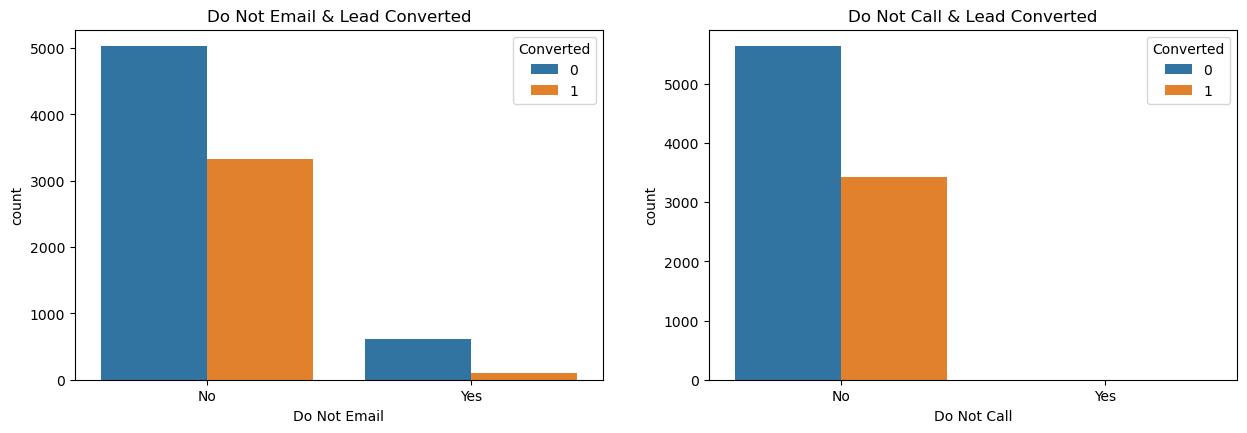

In [61]:
# Do Not Email & Lead Converted'
plt.figure (figsize= (15,10))
plt.subplot (2,2,1)
sns.countplot (data=df_lead_score_cleaned, x= 'Do Not Email', hue= 'Converted')
plt.title ('Do Not Email & Lead Converted')

# 'Do Not Call' & Lead Converted'
plt.subplot (2,2,2)
sns.countplot (data=df_lead_score_cleaned, x= 'Do Not Call', hue= 'Converted')
plt.title ('Do Not Call & Lead Converted')
plt.show()

##### Insight: 
Although custemor say 'No' to email & call, but they also converted into lead.

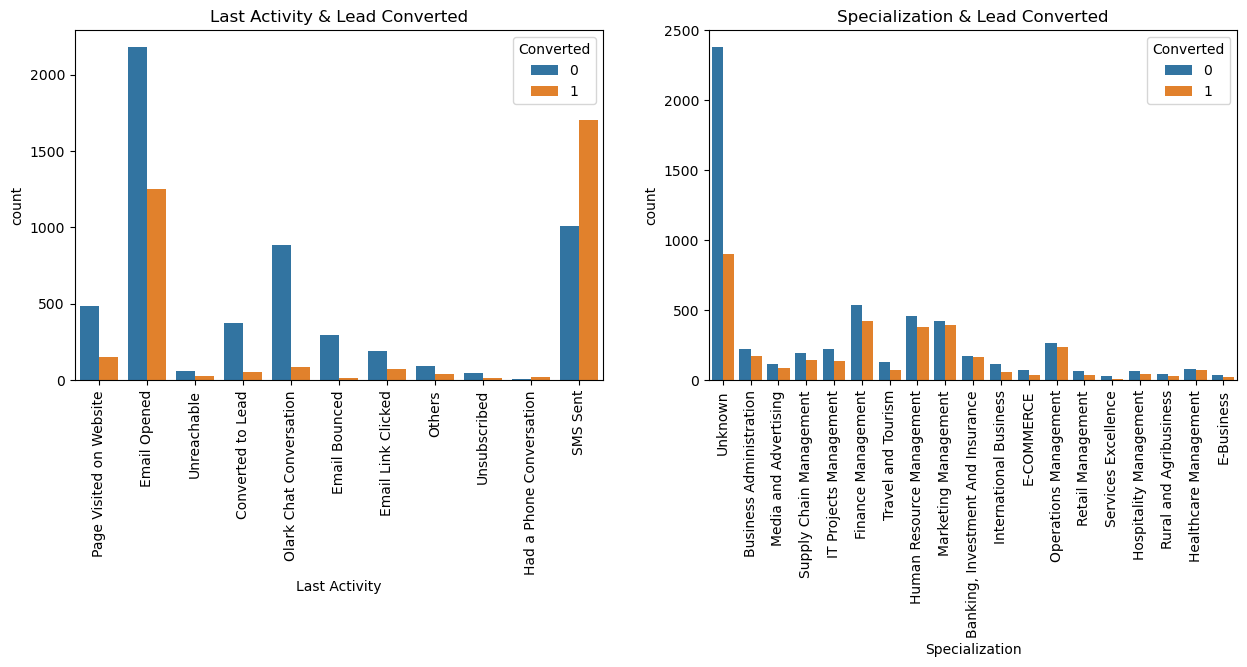

In [62]:
# Last Activity & Lead Converted'
plt.figure (figsize= (15,10))
plt.subplot (2,2,1)
sns.countplot (data=df_lead_score_cleaned, x= 'Last Activity', hue= 'Converted')
plt.xticks (rotation =90)
plt.title ('Last Activity & Lead Converted')

# 'Specialization' & Lead Converted'
plt.subplot (2,2,2)
sns.countplot (data=df_lead_score_cleaned, x= 'Specialization', hue= 'Converted')
plt.xticks (rotation =90)
plt.title ('Specialization & Lead Converted')
plt.show()

##### Insight: 
   1. Except SMS sent activity all last acity have high non converted count.
   2. In Specialization, Although many custemor have not filled this option, but Finance, HR, Marketing having good amount of convesion count.

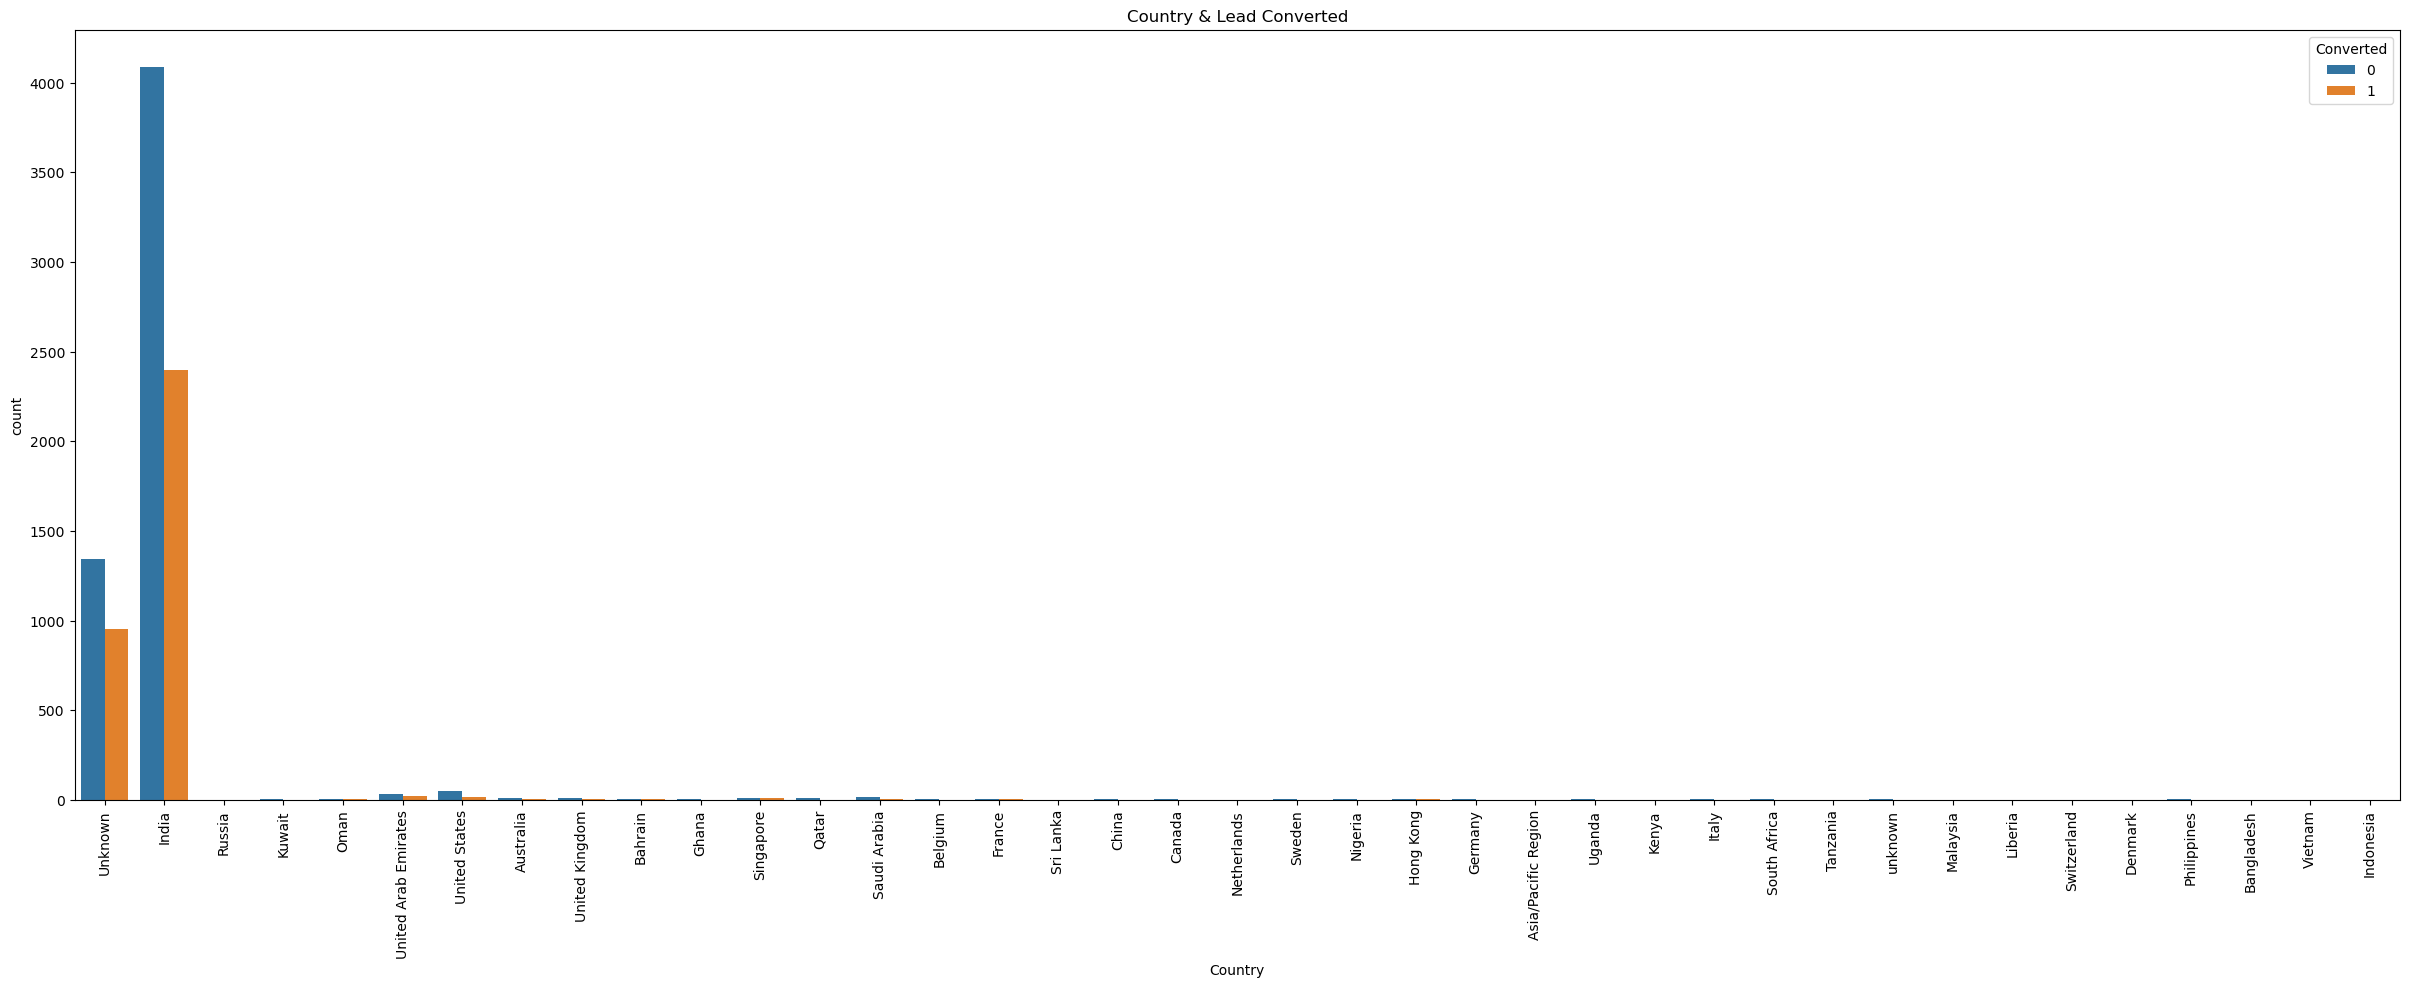

In [63]:
# Plot> Country & Lead Converted
plt.figure(figsize=(30,10))
sns.countplot (data=df_lead_score_cleaned, x='Country', hue= 'Converted')
plt.xticks (rotation=90)
plt.title ('Country & Lead Converted')
plt.show()

##### Insight: 
In India having highest lead conversion count & very few of from  UAE, USA.

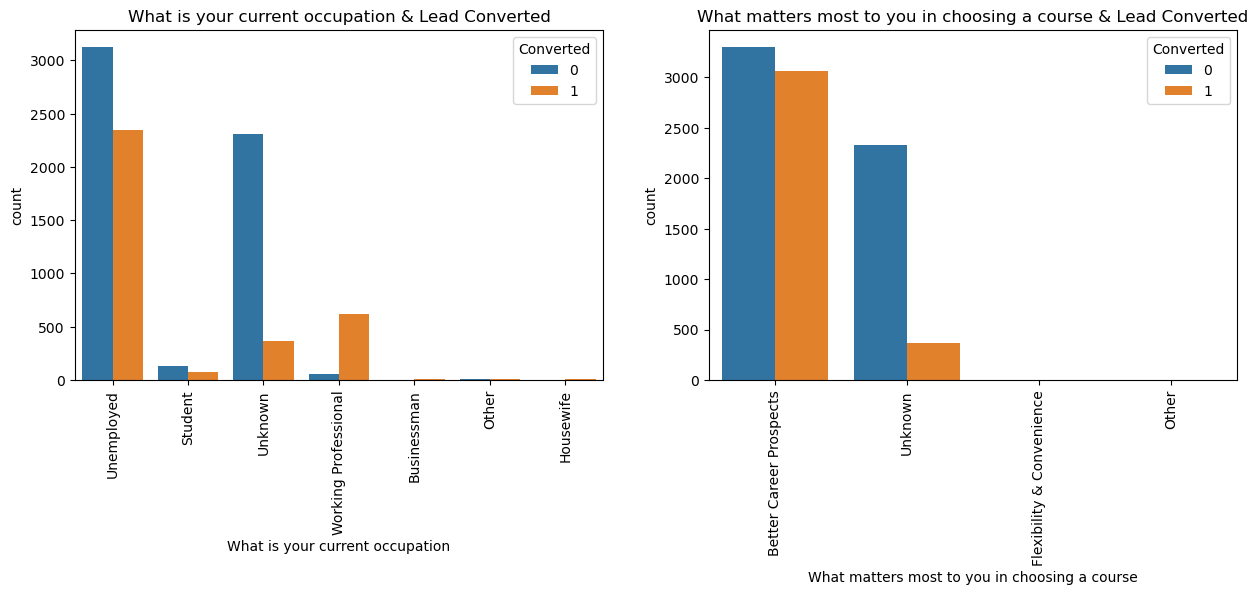

In [64]:
# 'What is your current occupation' & Lead Converted'
plt.figure (figsize= (15,10))
plt.subplot (2,2,1)
sns.countplot (data=df_lead_score_cleaned, x= 'What is your current occupation', hue= 'Converted')
plt.xticks (rotation =90)
plt.title ('What is your current occupation & Lead Converted')

# 'What matters most to you in choosing a course' & Lead Converted
plt.subplot (2,2,2)
sns.countplot (data=df_lead_score_cleaned, x= 'What matters most to you in choosing a course', hue= 'Converted')
plt.xticks (rotation =90)
plt.title ('What matters most to you in choosing a course & Lead Converted')
plt.show()

##### Insight: 
   1. Unemployed student count is higher in current occupation.
   2. Working Professionals having higher lead convesion rate.
   3. Better carrer prospect reason having high conversion count.

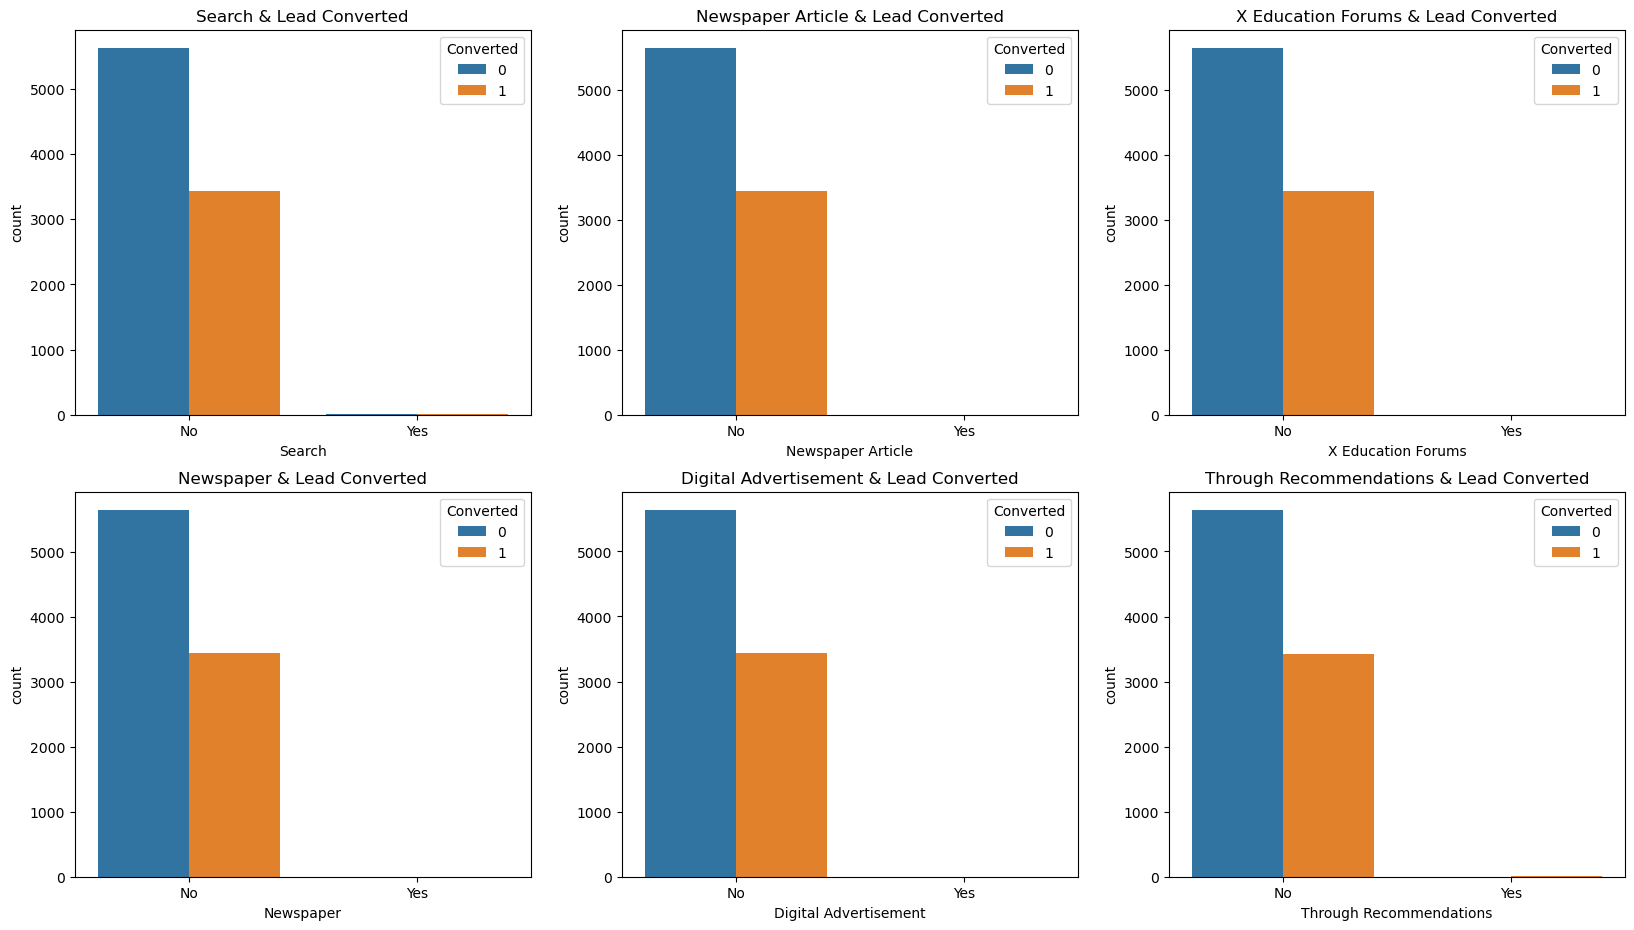

In [65]:
# Plots:'Search','Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'

plt.figure (figsize= (20,11))

# 'Search'
plt.subplot (2,3,1)
sns.countplot (data=df_lead_score_cleaned, x= 'Search', hue= 'Converted')
plt.title ('Search & Lead Converted')

# 'What matters most to you in choosing a course' & Lead Converted
plt.subplot (2,3,2)
sns.countplot (data=df_lead_score_cleaned, x= 'Newspaper Article', hue= 'Converted')
plt.title ('Newspaper Article & Lead Converted')

#'X Education Forums'
plt.subplot (2,3,3)
sns.countplot (data=df_lead_score_cleaned, x= 'X Education Forums', hue= 'Converted')
plt.title ('X Education Forums & Lead Converted')

#'Newspaper'
plt.subplot (2,3,4)
sns.countplot (data=df_lead_score_cleaned, x= 'Newspaper', hue= 'Converted')
plt.title ('Newspaper & Lead Converted')

#'Digital Advertisement'
plt.subplot (2,3,5)
sns.countplot (data=df_lead_score_cleaned, x= 'Digital Advertisement', hue= 'Converted')
plt.title ('Digital Advertisement & Lead Converted')

#'Through Recommendations'
plt.subplot (2,3,6)
sns.countplot (data=df_lead_score_cleaned, x= 'Through Recommendations', hue= 'Converted')
plt.title ('Through Recommendations & Lead Converted')
plt.show()

##### Insight:  

'Search','Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations' Indicating whether the customer had seen the ad in any of the listed items. But customer not seen any ad though these platforms, they have searched their own.

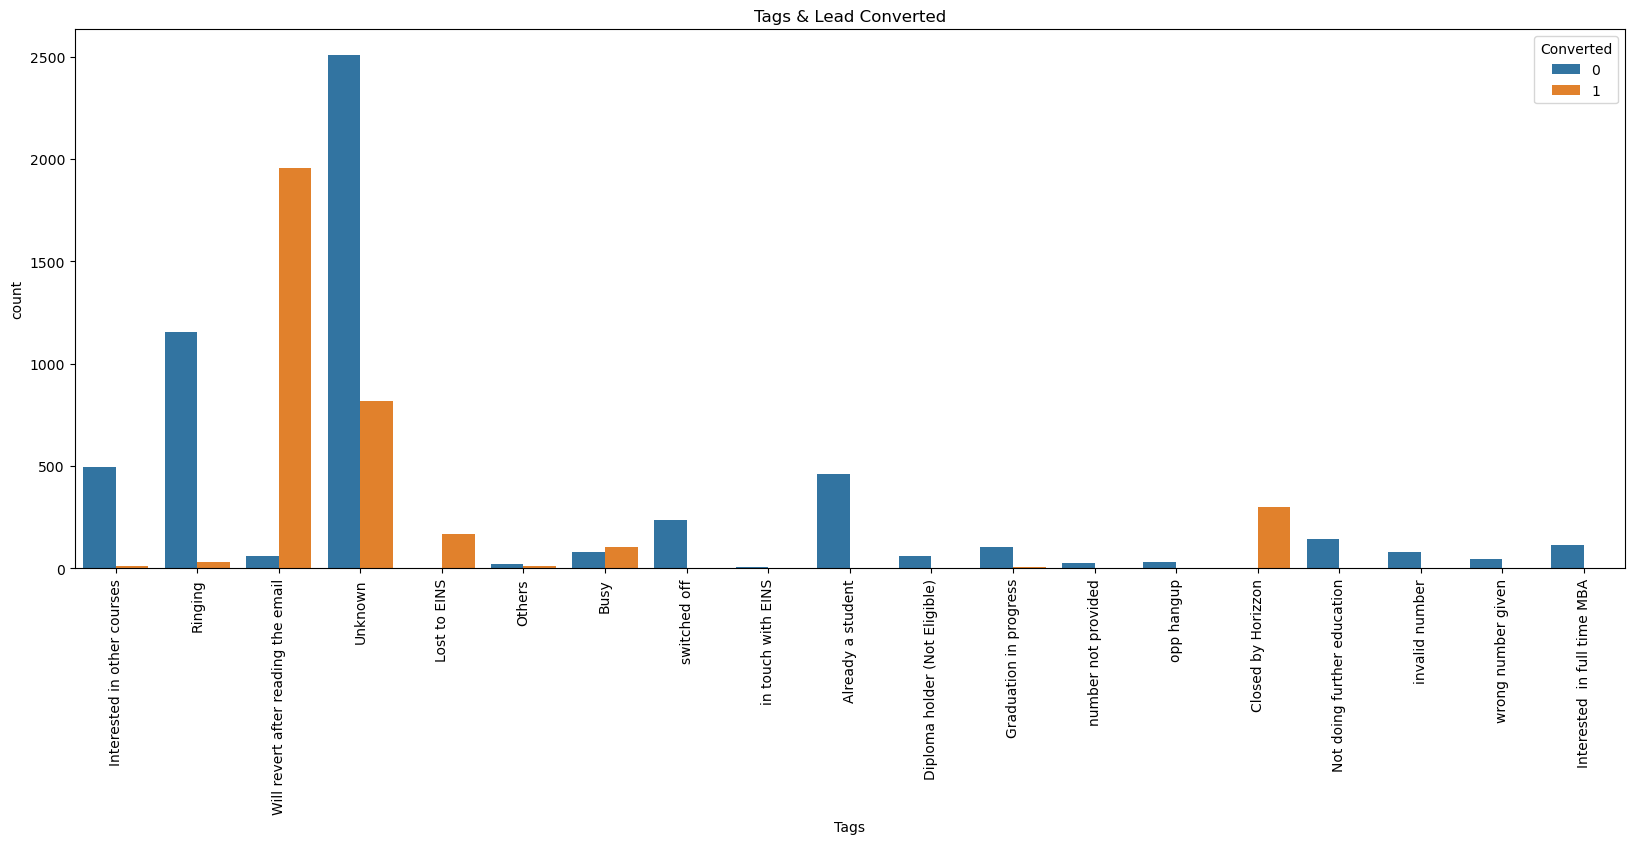

In [66]:
# Plots>>'Tags', 
plt.figure (figsize= (20,7))
sns.countplot (data=df_lead_score_cleaned, x= 'Tags', hue= 'Converted')
plt.xticks (rotation=90)
plt.title ('Tags & Lead Converted')
plt.show()

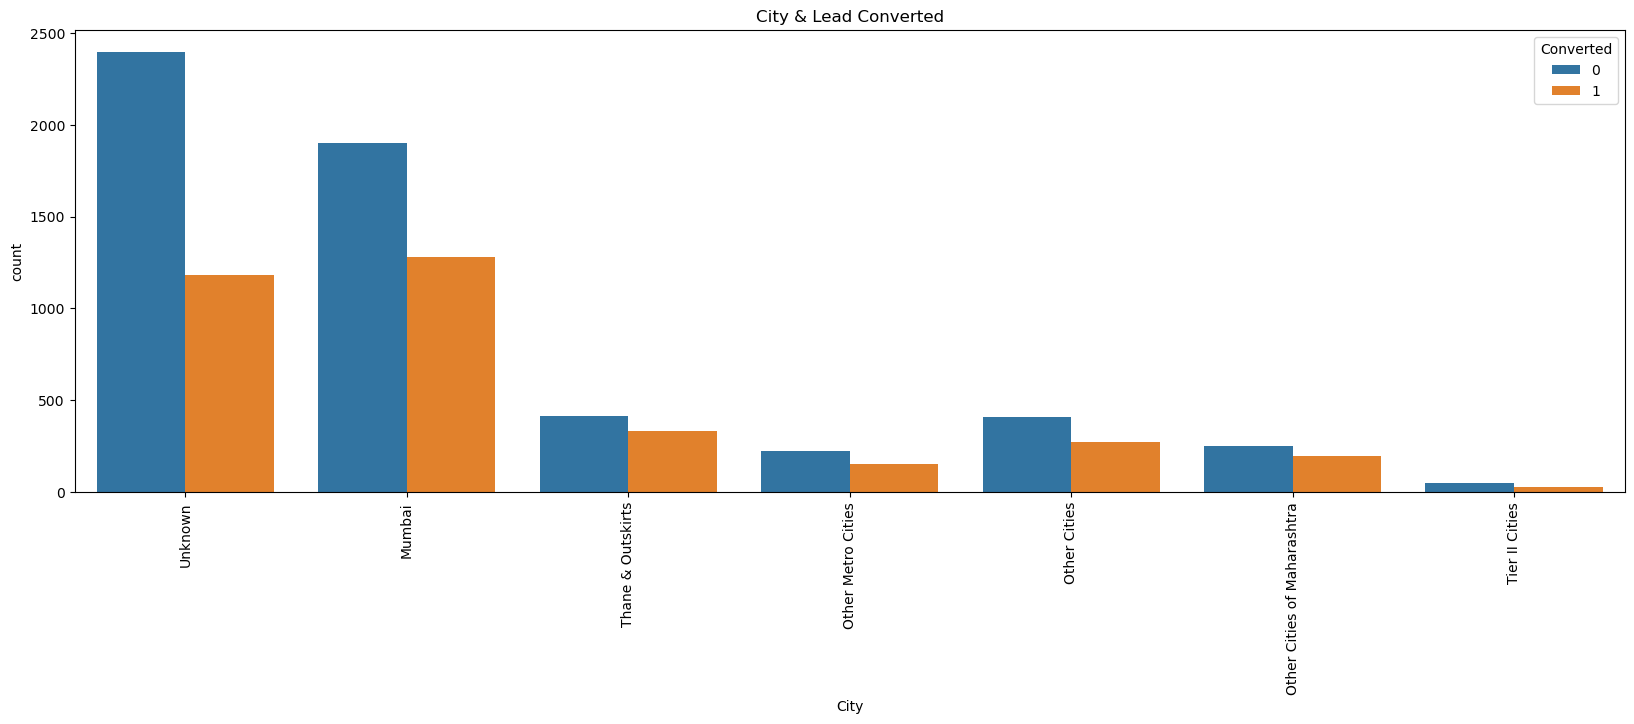

In [67]:
# Plot> 'City'
plt.figure (figsize= (20,6))
sns.countplot (data=df_lead_score_cleaned, x= 'City', hue= 'Converted')
plt.xticks (rotation=90)
plt.title ('City & Lead Converted')
plt.show()

##### Insights: 
Higher lead conversion count from Mumbai city than other part.

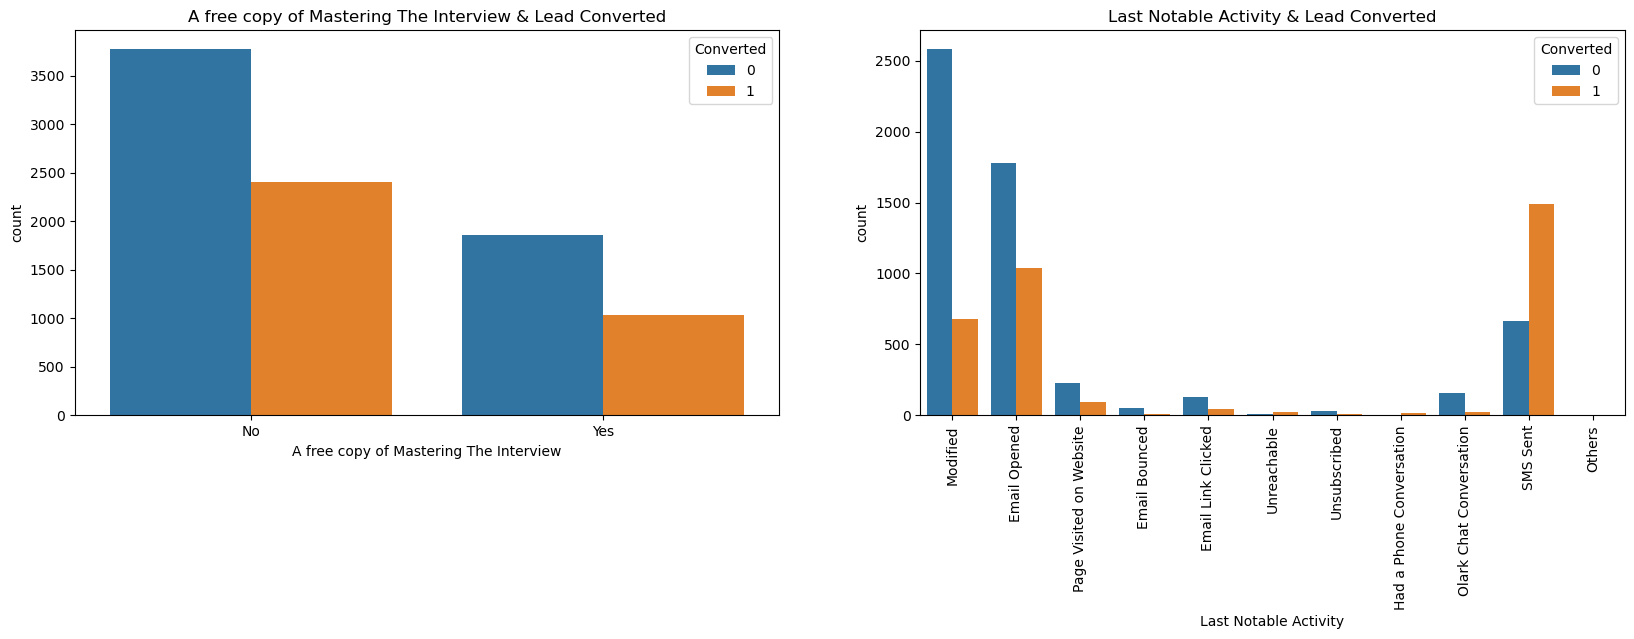

In [68]:
# Plots>>'A free copy of Mastering The Interview', 'Last Notable Activity'

plt.figure (figsize= (20,11))

# 'A free copy of Mastering The Interview'
plt.subplot (2,2,1)
sns.countplot (data=df_lead_score_cleaned, x= 'A free copy of Mastering The Interview', hue= 'Converted')
plt.title ('A free copy of Mastering The Interview & Lead Converted')

# 'Last Notable Activity'
plt.subplot (2,2,2)
sns.countplot (data=df_lead_score_cleaned, x= 'Last Notable Activity', hue= 'Converted')
plt.title ('Last Notable Activity & Lead Converted')
plt.xticks (rotation = 90)
plt.show()

##### Insights: 
  1. No special inffered from 'A free copy of Mastering The Interview.
  2. High lead conversion rate though the SMS in last mobile activity.

#### Deleting Unnecessary Columns:

After performing EDA, we understood that 'Search','Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations' are Unnecessory Columns, from which we will not get any inference.


In [69]:
# Dropping unnecessary columns

df_lead_score_cleaned_new = df_lead_score_cleaned.drop (['Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
'Through Recommendations', 'What matters most to you in choosing a course','Search','Page Views Per Visit',
'TotalVisits','Last Activity','A free copy of Mastering The Interview','Country', 'Lead Number', 'Tags'], axis=1)

In [70]:
# Final dataframe
df_lead_score_cleaned_new.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'Total Time Spent on Website', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Last Notable Activity'],
      dtype='object')

### 6.Splitting Data: Test & Train set

In [71]:
# Creating Dummy Variable before moving to Splitting Data

#### Dummy Variable

In [72]:
# Creating dummy variables
dummy = pd.get_dummies(df_lead_score_cleaned_new[['Lead Origin', 'Lead Source', 'Specialization', \
                                                  'What is your current occupation','Lead Quality', 'Lead Profile',\
                                                  'City', 'Asymmetrique Activity Index' ,'Last Notable Activity'\
                                                 ]], drop_first=True, dtype='int64')
dummy.head()

,Asymmetrique Activity Index,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Not known,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [73]:
dummy.shape

(9074, 74)

In [74]:
df_lead_score_cleaned_new.shape

(9074, 14)

In [75]:
# Creating Dummy varibale
df_lead_score_cleaned_dummy = pd.concat ([df_lead_score_cleaned_new, dummy], axis=1)
df_lead_score_cleaned_dummy.head(2)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Specialization,How did you hear about X Education,What is your current occupation,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Last Notable Activity,Asymmetrique Activity Index,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Not known,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,API,Olark Chat,No,No,0,0,Unknown,Unknown,Unemployed,Low in Relevance,Unknown,Unknown,2,Modified,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,No,No,0,674,Unknown,Unknown,Unemployed,Not known,Unknown,Unknown,2,Email Opened,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [76]:
# Dropping unnecessary columns which created dummies from it.

df_lead_score_cleaned_dummy = df_lead_score_cleaned_dummy.drop (['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation', \
                                   'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', \
                                   'How did you hear about X Education', 'Last Notable Activity'], axis=1)
df_lead_score_cleaned_dummy.head(3)

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Not known,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,No,No,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,No,No,0,674,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,No,No,1,1532,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [77]:
print(df_lead_score_cleaned_dummy['Do Not Email'].unique())
print(df_lead_score_cleaned_dummy['Do Not Call'].unique())

['No' 'Yes']
['No' 'Yes']


In [78]:
# Remove leading/trailing whitespace
df_lead_score_cleaned_dummy['Do Not Email'] = df_lead_score_cleaned_dummy['Do Not Email'].str.strip()
df_lead_score_cleaned_dummy['Do Not Call'] = df_lead_score_cleaned_dummy['Do Not Call'].str.strip()

In [79]:
# Converting 'Yes', 'No' to 1, 0.

df_lead_score_cleaned_dummy['Do Not Email'] = df_lead_score_cleaned_dummy['Do Not Email'].map({'Yes':1, 'No': 0})
df_lead_score_cleaned_dummy['Do Not Call'] = df_lead_score_cleaned_dummy['Do Not Call'].map({'Yes':1, 'No': 0})

In [80]:
# Checking conversion of 'Yes','No' to 1, 0 respectively.
df_lead_score_cleaned_dummy.head(3)

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Not known,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,0,0,674,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,1532,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [81]:
# Shape of dataframe

df_lead_score_cleaned_dummy.shape

(9074, 77)

#### Train-Test Split

In [82]:
# Creating X variable

X= df_lead_score_cleaned_dummy.drop (['Converted'], axis=1)
X.head(3)

,Do Not Email,Do Not Call,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Not known,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,0,674,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,0,0,1532,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [83]:
# Creating y variable

y= df_lead_score_cleaned_dummy['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [84]:
# Data Splitting into the train-test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

### 6.Scaling data

In [85]:
# Scaling the data

scaler = StandardScaler()
X_train[['Total Time Spent on Website']] = scaler.fit_transform(X_train[['Total Time Spent on Website']])
X_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Not known,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,0,0,-0.160255,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1012,1,0,-0.540048,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-0.888650,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4750,0,0,1.643304,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7987,0,0,2.017593,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


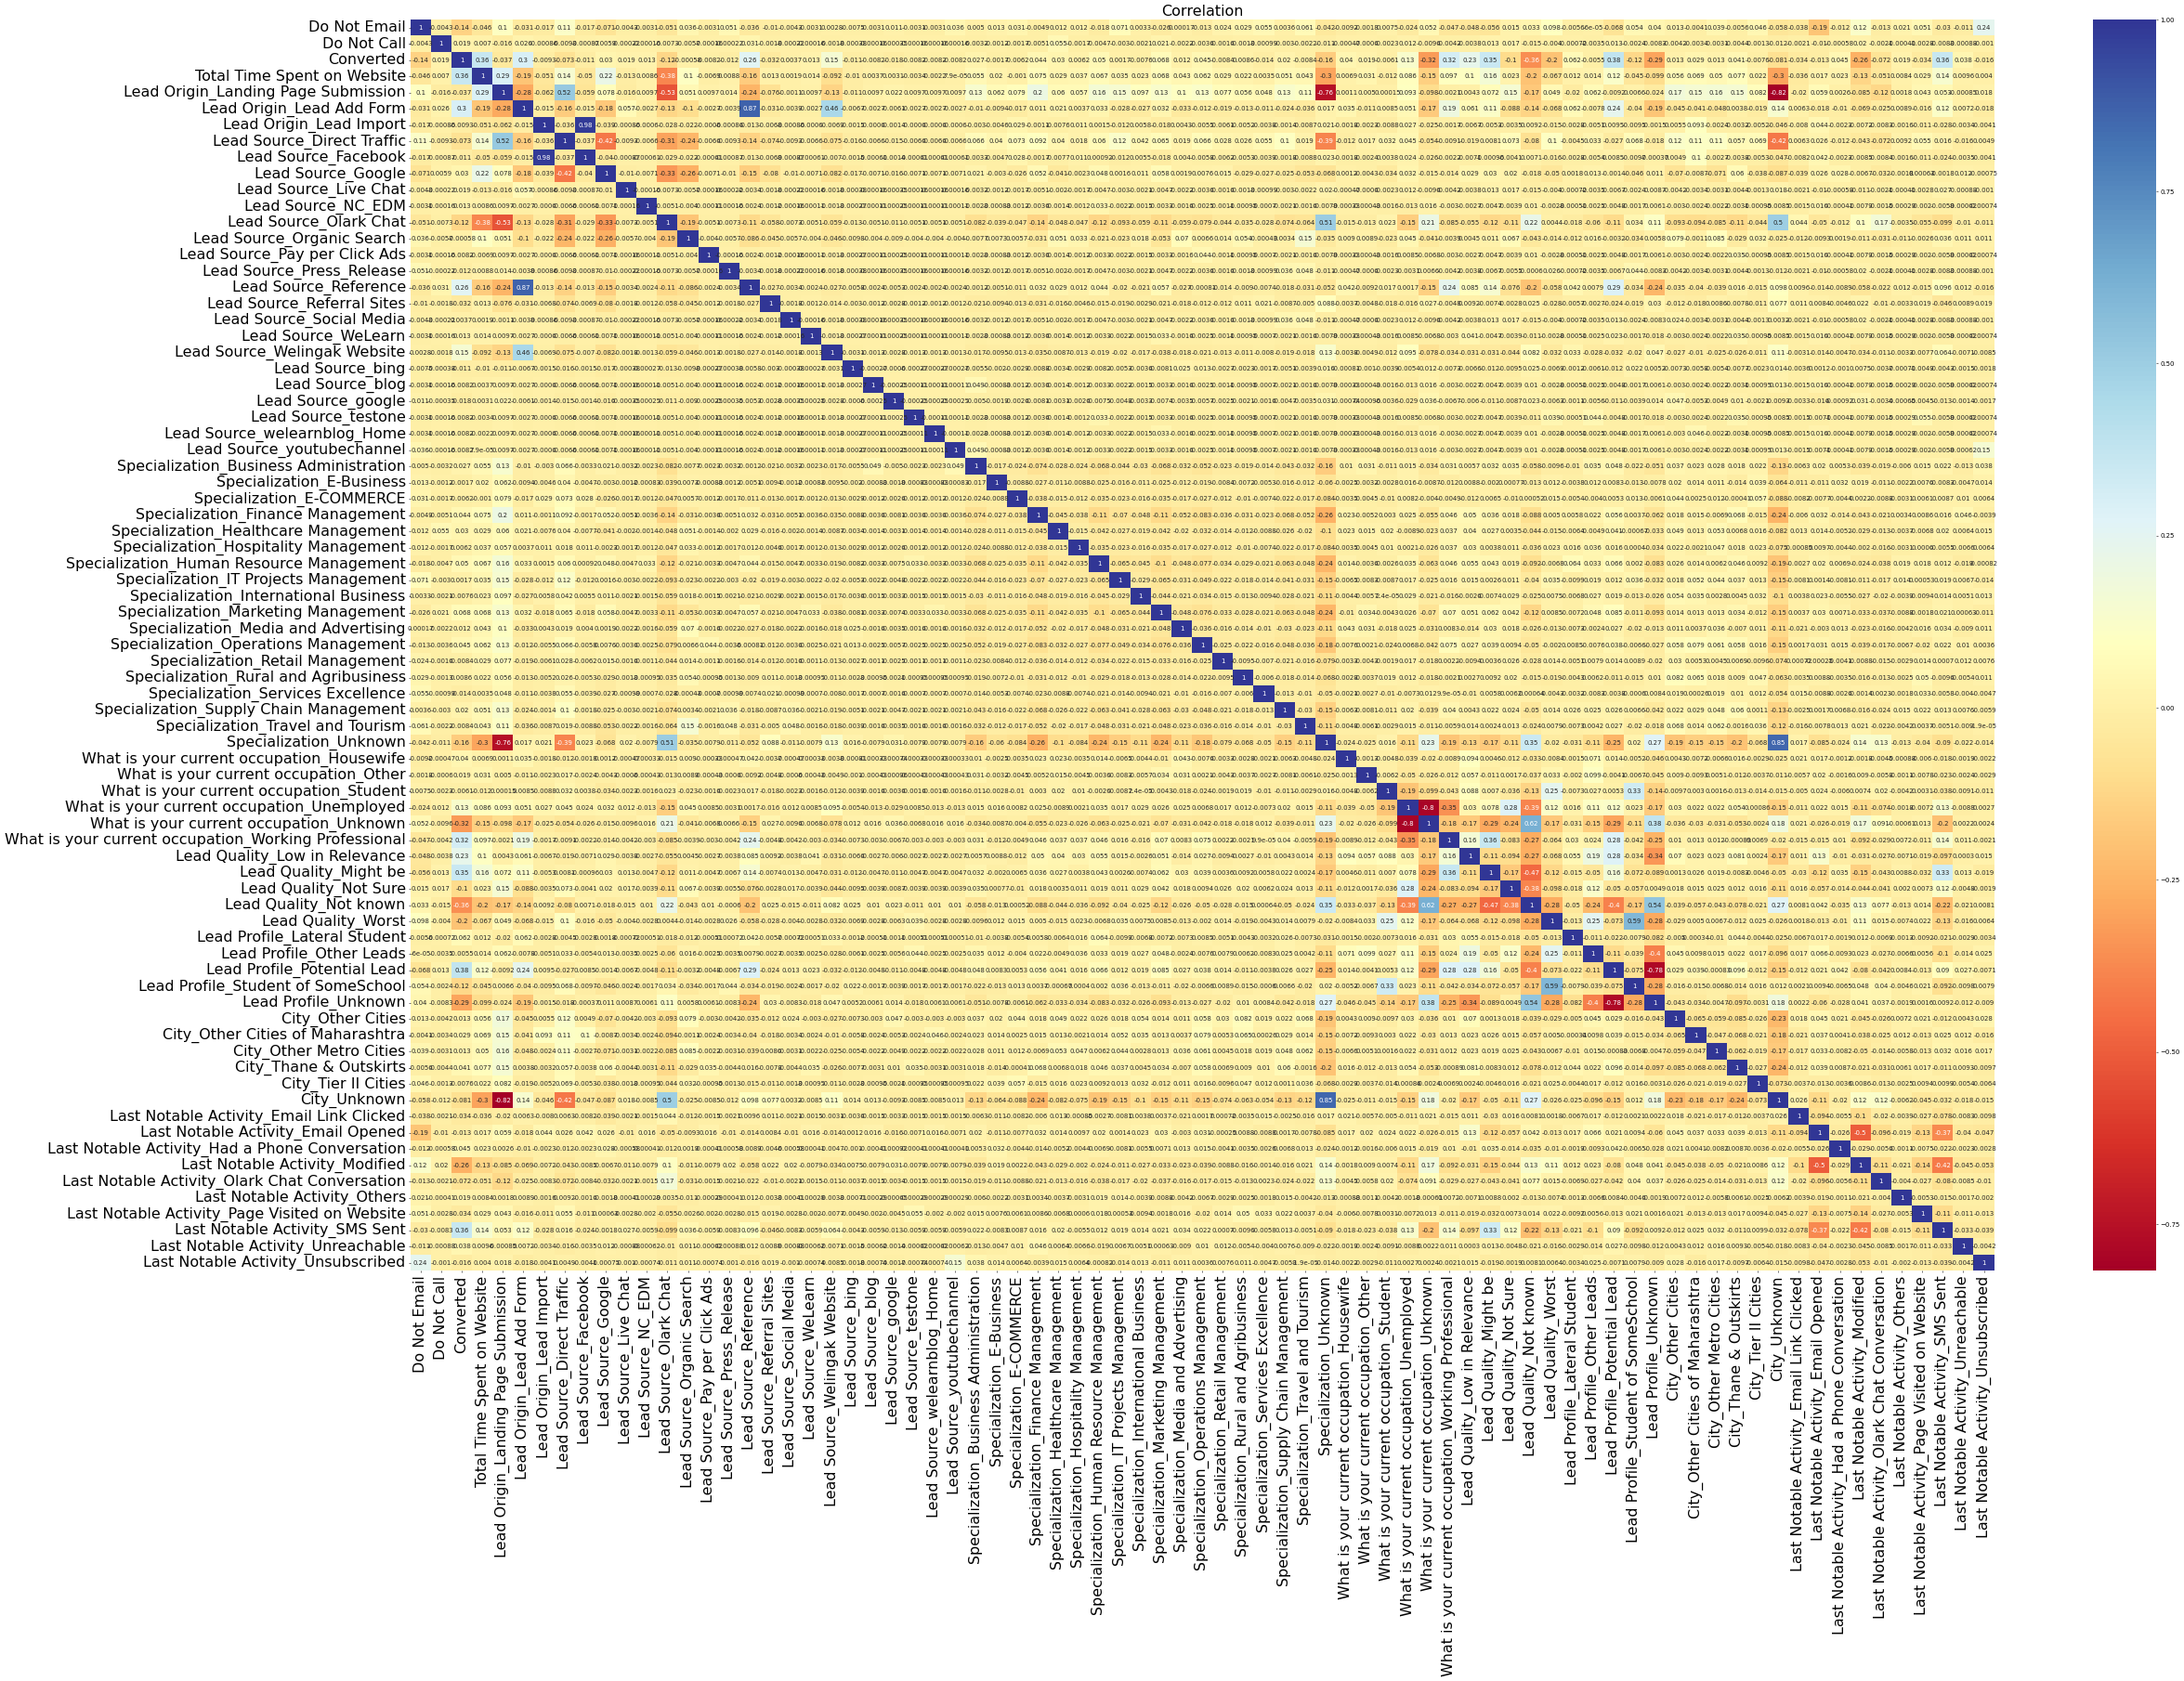

In [86]:
# Checking correlation
plt.figure(figsize=(55,35),dpi=50)
sns.heatmap(df_lead_score_cleaned_dummy.corr(), annot=True, cmap= 'RdYlBu', annot_kws={"size": 10})
plt.xticks (fontsize=23)
plt.yticks (fontsize=23)
plt.title('Correlation', fontsize=23)
plt.show()

### 7.Model Building

Using LogisticRegression because its need of project.

#### Using RFE
Running Logistic regression on all dataset and deleting columns one by one it will be time consuming, So we using here 
RFE (Recursive Feature Elimination) model removes the unwanted features/columns. 

In [87]:
# Importoing Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Creating the Logistic Regression object
logreg = LogisticRegression()

# RFE with 15 variables
rfe = RFE (estimator=logreg, n_features_to_select = 15)
rfe = rfe.fit (X_train, y_train)

In [88]:
rfe_table= pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), columns= ['Feature', 'Support', 'Rank'])
rfe_table.sort_values (by= 'Rank', ascending=True)

,Feature,Support,Rank
0,Do Not Email,True,1
73,Last Notable Activity_SMS Sent,True,1
68,Last Notable Activity_Had a Phone Conversation,True,1
58,Lead Profile_Student of SomeSchool,True,1
54,Lead Quality_Worst,True,1
...,...,...,...
62,City_Other Metro Cities,False,58
23,Lead Source_testone,False,59
41,Specialization_Supply Chain Management,False,60
29,Specialization_Finance Management,False,61


In [89]:
col = X_train.columns[rfe.support_]

In [90]:
# Top 15 Columns selected by RFE
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional',
       'Lead Quality_Might be', 'Lead Quality_Not Sure',
       'Lead Quality_Not known', 'Lead Quality_Worst',
       'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [91]:
# Columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Busine

In [92]:
# Creating X_test Dataframe with top 15 variable
X_train_rfe= X_train[col]

#### Manual Feature Elimination

In [93]:
# Importing statmodel
import statsmodels.api as sm

In [94]:
# Add Constant
X_train_sm = sm.add_constant(X_train_rfe)

# Building Model
logm1 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial()).fit()
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2189.6
Date:                Tue, 23 Jul 2024   Deviance:                       4379.2
Time:                        13:43:03   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4746
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0487      0.126      8.313      0.000       0.801       1.296
Do Not Email                                            -1.5424      0.203     -7.609      0.000      -1.940      -1.145
Total Time Spent on Website                              1.1038      0.045     24.468      0.000       1.015       1.192
Lead Origin_Lead Add Form                                2.8038      0.248     11.321      0.000       2.318       3.289
Lead Source_Olark Chat                                   1.3014      0.113     11.498      0.000       1.080       1.523
Lead Source_Welingak Website                             3.7389      0.766      4.884      0.000       2.238       5.239
What is your current occupation_Working Professional     1.7725      0.220      8.065      0.000       1.342       2.203
Lead Quality_Might be                                   -1.4814      0.154     -9.620      0.000      -1.783      -1.180
Lead Quality_Not Sure                                   -3.3797      0.168    -20.058      0.000      -3.710      -3.049
Lead Quality_Not known                                  -3.2085      0.138    -23.323      0.000      -3.478      -2.939
Lead Quality_Worst                                      -5.0934      0.409    -12.443      0.000      -5.896      -4.291
Lead Profile_Student of SomeSchool                      -0.9144      0.649     -1.408      0.159      -2.187       0.358
Last Notable Activity_Had a Phone Conversation           2.6638      1.195      2.230      0.026       0.322       5.005
Last Notable Activity_SMS Sent                           1.7377      0.090     19.336      0.000       1.562       1.914
Last Notable Activity_Unreachable                        1.8472      0.545      3.391      0.001       0.780       2.915
Last Notable Activity_Unsubscribed                       1.3586      0.640      2.124      0.034       0.105       2.612
========================================================================================================================
"""

In [95]:
# VIF (Variance Inflation Factor) Check for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
# VIF
vif= pd.DataFrame()
vif['Feature']=X_train_rfe.columns
vif['VIF']= [variance_inflation_factor(X_train_rfe.values,i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif= vif.sort_values(by='VIF', ascending=False)
vif

,Feature,VIF
9,Lead Quality_Worst,1.59
12,Last Notable Activity_SMS Sent,1.59
2,Lead Origin_Lead Add Form,1.57
6,Lead Quality_Might be,1.57
10,Lead Profile_Student of SomeSchool,1.55
3,Lead Source_Olark Chat,1.49
8,Lead Quality_Not known,1.45
4,Lead Source_Welingak Website,1.36
1,Total Time Spent on Website,1.29
5,What is your current occupation_Working Profes...,1.29


In [97]:
# P-value is high in 'Lead Profile_Student of SomeSchool' so dropping it.
X_train_rfe= X_train_rfe.drop(['Lead Profile_Student of SomeSchool'], axis=1)

In [98]:
# Model2
# Add Constant
X_train_sm = sm.add_constant(X_train_rfe)

# Building Model
logm2 = sm.GLM(y_train, X_train_sm,family=sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2190.7
Date:                Tue, 23 Jul 2024   Deviance:                       4381.4
Time:                        13:43:03   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4744
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0404      0.126      8.264      0.000       0.794       1.287
Do Not Email                                            -1.5401      0.203     -7.598      0.000      -1.937      -1.143
Total Time Spent on Website                              1.1031      0.045     24.474      0.000       1.015       1.191
Lead Origin_Lead Add Form                                2.8059      0.248     11.325      0.000       2.320       3.292
Lead Source_Olark Chat                                   1.2983      0.113     11.480      0.000       1.077       1.520
Lead Source_Welingak Website                             3.7355      0.766      4.879      0.000       2.235       5.236
What is your current occupation_Working Professional     1.7690      0.220      8.056      0.000       1.339       2.199
Lead Quality_Might be                                   -1.4745      0.154     -9.590      0.000      -1.776      -1.173
Lead Quality_Not Sure                                   -3.3733      0.168    -20.047      0.000      -3.703      -3.043
Lead Quality_Not known                                  -3.2004      0.137    -23.310      0.000      -3.470      -2.931
Lead Quality_Worst                                      -5.3445      0.389    -13.735      0.000      -6.107      -4.582
Last Notable Activity_Had a Phone Conversation           2.6658      1.194      2.232      0.026       0.325       5.006
Last Notable Activity_SMS Sent                           1.7396      0.090     19.361      0.000       1.564       1.916
Last Notable Activity_Unreachable                        1.8489      0.544      3.396      0.001       0.782       2.916
Last Notable Activity_Unsubscribed                       1.3594      0.639      2.127      0.033       0.107       2.612
========================================================================================================================
"""

In [99]:
# VIF
vif= pd.DataFrame()
vif['Feature']=X_train_rfe.columns
vif['VIF']= [variance_inflation_factor(X_train_rfe.values,i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif= vif.sort_values(by='VIF', ascending=False)
vif

,Feature,VIF
11,Last Notable Activity_SMS Sent,1.59
2,Lead Origin_Lead Add Form,1.57
6,Lead Quality_Might be,1.57
3,Lead Source_Olark Chat,1.49
8,Lead Quality_Not known,1.45
4,Lead Source_Welingak Website,1.36
1,Total Time Spent on Website,1.29
5,What is your current occupation_Working Profes...,1.29
0,Do Not Email,1.17
7,Lead Quality_Not Sure,1.13


##### Observation:
From above model logm2 p-value is below 0.05 and VIF also below 5. So we not dropping variable further.

### 8. Making Prediction on Train Dataset

In [100]:
# Predicted values on train set

y_train_pred = logm2.predict(X_train_sm)
y_train_pred [:10]

3009    0.088118
1012    0.073993
9226    0.117641
4750    0.800967
7987    0.473206
1281    0.910258
2880    0.041796
4971    0.818599
7536    0.983101
1248    0.472404
dtype: float64

In [101]:
# Reshaping Dataframe

y_train_pred= y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0881175 , 0.07399253, 0.11764132, 0.80096689, 0.47320631,
       0.91025806, 0.04179632, 0.81859896, 0.98310063, 0.47240408])

In [102]:
# Creating Dataframe with actual and predicted values

y_train_pred_final=pd.DataFrame({'Converted': y_train.values, 'Converted_Prob': y_train_pred} )

# 'Prospect ID' for indexing 
y_train_pred_final['Prospect_ID']=y_train.index

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect_ID
0,0,0.088118,3009
1,0,0.073993,1012
2,0,0.117641,9226
3,1,0.800967,4750
4,1,0.473206,7987


In [103]:
# Assuming that greater than 0.5 is lead conversion, creating column 'Predicted'

y_train_pred_final['Predicted']= y_train_pred_final.Converted_Prob.map (lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect_ID,Predicted
0,0,0.088118,3009,0
1,0,0.073993,1012,0
2,0,0.117641,9226,0
3,1,0.800967,4750,1
4,1,0.473206,7987,0


In [104]:
from sklearn import metrics

# Trying Confusion metrix on data
Confusion = metrics.confusion_matrix (y_train_pred_final.Converted, y_train_pred_final.Predicted)
Confusion

array([[3546,  359],
       [ 617, 1829]], dtype=int64)

In [105]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8463234136356479

Accuracy always not right metric, so need to calculate these all metrics:
   1. Accuracy
   2. Sensitivity
   3. Specificity
   4. Precision
   5. Recall

In [106]:
TP = Confusion[1,1] # True Positive
TN = Confusion[0,0] # True Negative
FP = Confusion[0,1] # False Positive
FN = Confusion[1,0] # False Negative

In [107]:
# Sensitivity
TP/float(TP+FN)

0.7477514309076042

In [108]:
# Specificity
TN/float(TN+FP)

0.9080665813060179

In [109]:
# False Postive Rate
FP/float(TN+FP)

0.09193341869398207

In [110]:
# Positive Prediction Values
TP/float(TP+FP)

0.8359232175502742

In [111]:
# Negative Prediction Value
TN/float(TN+FN)

0.8517895748258467

### 9. Finding Optimal Cutoff

In [112]:
# Creating column of differant probabily cutoff

numbers= [float(x)/10 for x in range (10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1if x>i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.088118,3009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.073993,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.117641,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.800967,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.473206,7987,0,1,1,1,1,1,0,0,0,0,0


In [113]:
# Calculating Accuracy, Sensitivity and specificity for various probability cutoffs

cutoff_df= pd.DataFrame(columns= ['Prob', 'Accuracy', 'Sensi', 'Specif'])

num= [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

# TP = Confusion[1,1] # True Positive
# TN = Confusion[0,0] # True Negative
# FP = Confusion[0,1] # False Positive
# FN = Confusion[1,0] # False Negative


for i in num:
    cm1=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1= sum(sum(cm1))
    Accuracy= (cm1[0,0]+cm1[1,1])/total1
    
    Specif= cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensi= cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    cutoff_df.loc[i]=[i, Accuracy, Sensi, Specif]
print(cutoff_df)

     Prob  Accuracy     Sensi    Specif
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.689025  0.968111  0.514213
0.2   0.2  0.812470  0.913328  0.749296
0.3   0.3  0.843332  0.861406  0.832010
0.4   0.4  0.853251  0.817253  0.875800
0.5   0.5  0.846323  0.747751  0.908067
0.6   0.6  0.841127  0.704007  0.927017
0.7   0.7  0.834514  0.644726  0.953393
0.8   0.8  0.814832  0.563778  0.972087
0.9   0.9  0.774524  0.435814  0.986684


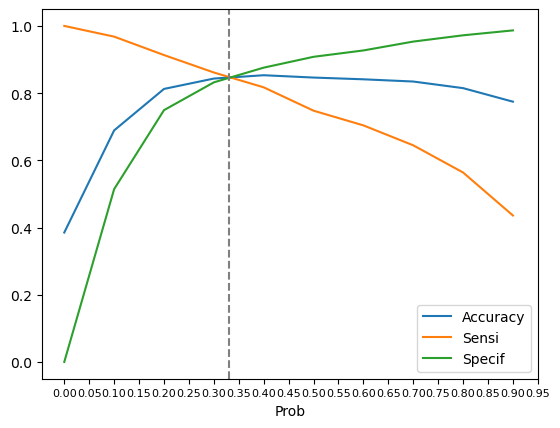

In [114]:
# Plot>>  Accuracy, Sensitivity and specificity for various probability cutoffs

cutoff_df.plot.line(x='Prob', y=['Accuracy', 'Sensi', 'Specif'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.33, color='Gray', linestyle='--') # additing axline
plt.show()

##### Observation: 
0.33 is optimal cutoff

In [115]:
# Calculating final prediction

y_train_pred_final['Final_predicted']= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x >0.33 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,0,0.088118,3009,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.073993,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.117641,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.800967,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.473206,7987,0,1,1,1,1,1,0,0,0,0,0,1


In [116]:
# Lead Score between 0 to 100
y_train_pred_final ['Lead_Score']= y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted,Lead_Score
0,0,0.088118,3009,0,1,0,0,0,0,0,0,0,0,0,0,9
1,0,0.073993,1012,0,1,0,0,0,0,0,0,0,0,0,0,7
2,0,0.117641,9226,0,1,1,0,0,0,0,0,0,0,0,0,12
3,1,0.800967,4750,1,1,1,1,1,1,1,1,1,1,0,1,80
4,1,0.473206,7987,0,1,1,1,1,1,0,0,0,0,0,1,47


In [117]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_predicted)

0.8480554243426232

In [118]:
# Confusion Metrix
Confusion2= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_predicted)
Confusion2

array([[3312,  593],
       [ 372, 2074]], dtype=int64)

In [119]:
TP = Confusion2[1,1] # True Positive
TN = Confusion2[0,0] # True Negative
FP = Confusion2[0,1] # False Positive
FN = Confusion2[1,0] # False Negative

In [120]:
# Sensitivity
TP/float(TP+FN)

0.8479149632052331

In [121]:
# Specificity
TN/float(TN+FP)

0.8481434058898848

In [122]:
# Calculate false postive rate
FP/float(TN+FP)

0.15185659411011523

In [123]:
# Positive prediction value

TP/float(TP+FP)

0.7776527934008249

In [124]:
# Negative prediction valoe
TN/float(TN+FN)

0.8990228013029316

### 10. Prediction on Test Data

In [125]:
#scaler
X_test[['Total Time Spent on Website']]=scaler.transform (X_test[['Total Time Spent on Website']])

In [126]:
# Same column as we used for X_train
X_test=X_test[col]
X_test=X_test.drop (['Lead Profile_Student of SomeSchool'], axis=1)
X_test.head(2)

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,What is your current occupation_Working Professional,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Not known,Lead Quality_Worst,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3271,0,-0.600595,0,0,0,0,0,0,1,0,0,0,0,0
1490,0,1.887326,0,0,0,1,0,0,0,0,0,0,0,0


In [127]:
# Add Constant 
X_test_sm = sm.add_constant(X_test)

In [128]:
# Making Prediction
y_test_pred= logm2.predict(X_test_sm)

In [129]:
y_test_pred[:10]

3271    0.056116
1490    0.992545
7936    0.047853
4216    0.946140
3830    0.056871
1800    0.878991
6507    0.212073
4821    0.146789
4223    0.990104
4714    0.136804
dtype: float64

In [130]:
# Converting Y_pred to dataframe
y_pred_1= pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
3271,0.056116
1490,0.992545
7936,0.047853
4216,0.946140
3830,0.056871


In [131]:
# Converting y_test to dataframe

y_test_df= pd.DataFrame(y_test)

In [132]:
# Putting Prospect ID to Index
y_test_df['Prospect_ID']= y_test_df.index

In [133]:
# Removing index for both dataframe to append side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [134]:
# Append y_pred_1, y_test_df
y_pred_final= pd.concat([y_pred_1, y_test_df], axis=1)

In [135]:
# Rename columns
y_pred_final= y_pred_final.rename(columns={0:'Converted_Prob'})

In [136]:
# Rearrange columns
y_pred_final= y_pred_final.reindex(['Prospect_ID', 'Converted','Converted_Prob' ], axis=1)

In [137]:
# y_pred_final
y_pred_final.head()

,Prospect_ID,Converted,Converted_Prob
0,3271,0,0.056116
1,1490,1,0.992545
2,7936,0,0.047853
3,4216,1,0.946140
4,3830,0,0.056871


In [138]:
y_pred_final['final_predicted']= y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.33 else 0)

In [139]:
y_pred_final.head()

,Prospect_ID,Converted,Converted_Prob,final_predicted
0,3271,0,0.056116,0
1,1490,1,0.992545,1
2,7936,0,0.047853,0
3,4216,1,0.946140,1
4,3830,0,0.056871,0


### 11. Model Evaluation

In [140]:
# Checking Accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8406169665809768

In [141]:
# Lead Score on test dataset
y_pred_final['Lead_Score']= y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head()

,Prospect_ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,3271,0,0.056116,0,6
1,1490,1,0.992545,1,99
2,7936,0,0.047853,0,5
3,4216,1,0.946140,1,95
4,3830,0,0.056871,0,6


In [142]:
# Confusion Metrix
Confusion3= metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
Confusion3

array([[1472,  262],
       [ 172,  817]], dtype=int64)

In [143]:
TP = Confusion3[1,1] # True Positive
TN = Confusion3[0,0] # True Negative
FP = Confusion3[0,1] # False Positive
FN = Confusion3[1,0] # False Negative

In [144]:
# Sensitivity
TP/float(TP+FN)

0.8260869565217391

In [145]:
# Specificity
TN/float(TN+FP)

0.8489042675893888

In [146]:
# False Postive Rate 
FP/float(TN+FP)

0.1510957324106113

In [147]:
# Positive Predictive values
TP/float(TP+FP)

0.7571825764596849

In [148]:
# Negative Prediction Value
TN/float(TN+FN)

0.8953771289537713

#### Precision

In [149]:
from sklearn.metrics import precision_score

# Precision
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7571825764596849

#### Recall


In [150]:
from sklearn.metrics import recall_score

# Recall
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8260869565217391

#### Final Train-Test Dataset

In [151]:
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted,Lead_Score
0,0,0.088118,3009,0,1,0,0,0,0,0,0,0,0,0,0,9
1,0,0.073993,1012,0,1,0,0,0,0,0,0,0,0,0,0,7
2,0,0.117641,9226,0,1,1,0,0,0,0,0,0,0,0,0,12
3,1,0.800967,4750,1,1,1,1,1,1,1,1,1,1,0,1,80
4,1,0.473206,7987,0,1,1,1,1,1,0,0,0,0,0,1,47


In [152]:
y_pred_final.head()

,Prospect_ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,3271,0,0.056116,0,6
1,1490,1,0.992545,1,99
2,7936,0,0.047853,0,5
3,4216,1,0.946140,1,95
4,3830,0,0.056871,0,6


#### Observation:

Sensitivity value for train data is 80%. And for train dataset it is 79% . Accuracy values are also ~80 %. Which shows model perform well on test dataset also. 

### 12. Determining Top Features:

In [153]:
# Parameter of logm2
pd.options.display.float_format='{:.2f}'.format
logm2.params[1:]

Do Not Email                                           -1.54
Total Time Spent on Website                             1.10
Lead Origin_Lead Add Form                               2.81
Lead Source_Olark Chat                                  1.30
Lead Source_Welingak Website                            3.74
What is your current occupation_Working Professional    1.77
Lead Quality_Might be                                  -1.47
Lead Quality_Not Sure                                  -3.37
Lead Quality_Not known                                 -3.20
Lead Quality_Worst                                     -5.34
Last Notable Activity_Had a Phone Conversation          2.67
Last Notable Activity_SMS Sent                          1.74
Last Notable Activity_Unreachable                       1.85
Last Notable Activity_Unsubscribed                      1.36
dtype: float64

In [154]:
# Coefficient values for all features 

top_feature= logm2.params[1:]
top_feature= (top_feature/top_feature.max())*100
top_feature

Do Not Email                                            -41.23
Total Time Spent on Website                              29.53
Lead Origin_Lead Add Form                                75.12
Lead Source_Olark Chat                                   34.75
Lead Source_Welingak Website                            100.00
What is your current occupation_Working Professional     47.36
Lead Quality_Might be                                   -39.47
Lead Quality_Not Sure                                   -90.30
Lead Quality_Not known                                  -85.68
Lead Quality_Worst                                     -143.07
Last Notable Activity_Had a Phone Conversation           71.36
Last Notable Activity_SMS Sent                           46.57
Last Notable Activity_Unreachable                        49.50
Last Notable Activity_Unsubscribed                       36.39
dtype: float64

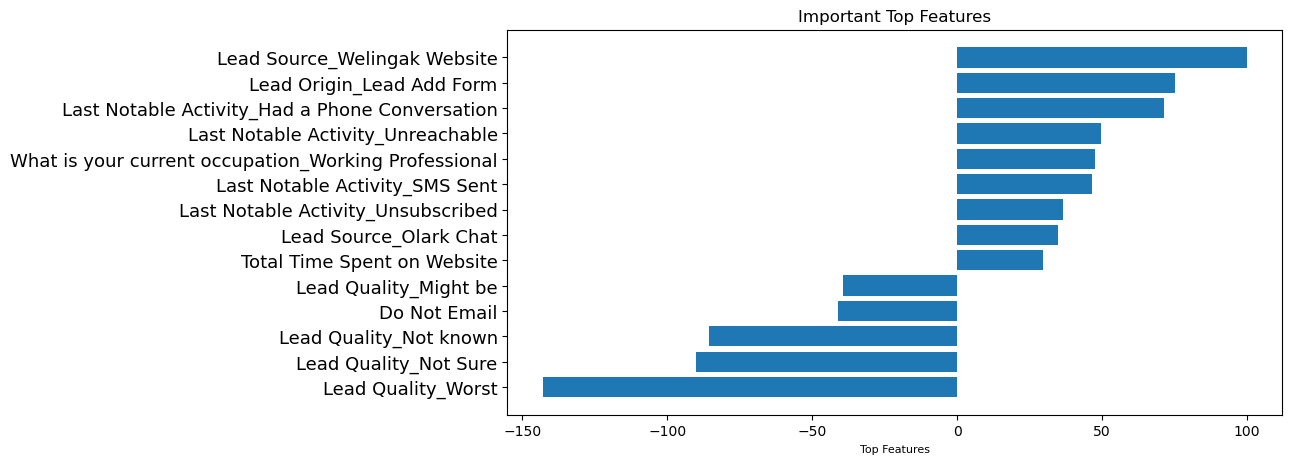

In [155]:
# Plotting the features variables on importance

top_feature_sort= np.argsort(top_feature, kind='quicksort', order='list of str')
pos=np.arange(top_feature_sort.shape[0])+0.5

fig1= plt.figure(figsize=(10,5))
ax=fig1.add_subplot(1,1,1)
ax.barh(pos, top_feature[top_feature_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train_rfe.columns)[top_feature_sort], fontsize=13)
ax.set_xlabel('Top Features', fontsize=8)
ax.set_title('Important Top Features')
plt.show()

### 13. Recommendation

Important features to improve lead conversion rate in X-Education company.

- Last Notable Activity_Had a Phone Conversation: Most recent action was via phone conversation could lead to business.
- Lead Origin_Lead Add Form: Obtaining more leads from leads who have engaged with the "Lead Add Form," since they have a better likelihood of converting.
- Lead Source_Welingak Website: Company can focus more on this website to get more leads.
- What is your current occupation_Working Professional: Company can focus on working professionals to get more numbers of leads.
- Last Notable Activity_Unsubscribed: Last Notable Activity is also important lead.

====================================================================================================================